# **Importing the necessary libraries**

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **read the transaction_data using pandas**

In [16]:
transaction_df = pd.read_csv("/content/transaction_data_real.csv")
print(transaction_df.shape)  # Should show (264836, 8)


(264836, 8)


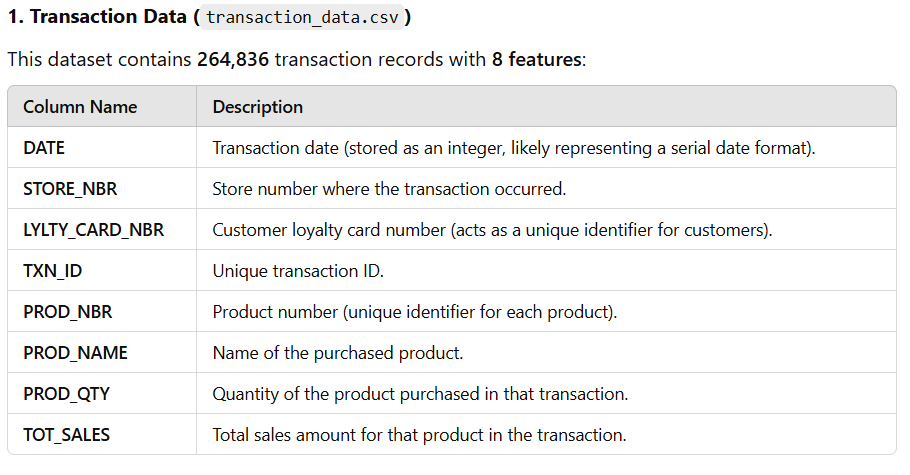

# **the first 5 rows of the DataFrame**

In [17]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# **read the purchase_behaviour data using pandas**

In [18]:
purchase_behaviour_df=pd.read_csv("/content/purchase_behaviour.csv")

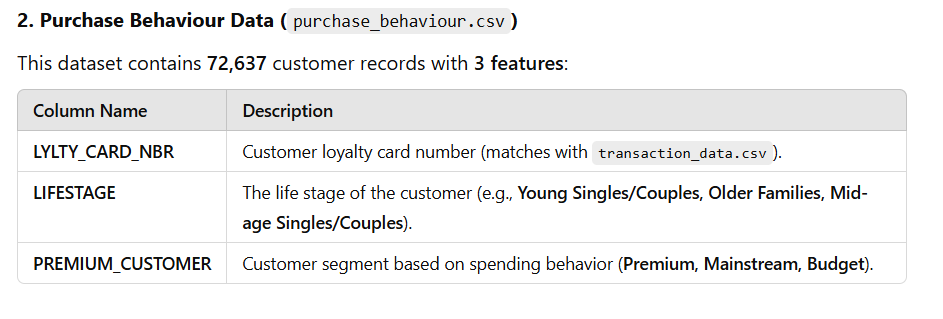

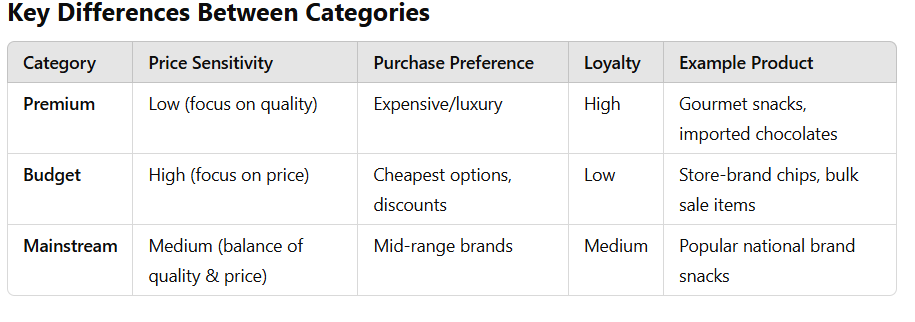

# **the first 5 rows of the DataFrame**

In [19]:
# Print first few rows
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


**purchase_behaviour_df.shape is a pandas function that returns the number of rows and columns in the dataset.**

In [20]:
purchase_behaviour_df.shape

(72637, 3)

In [21]:
# Check the null values
transaction_df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [22]:
purchase_behaviour_df.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [23]:
# Check the Data types
transaction_df.dtypes

,0
DATE,int64
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


In [24]:
purchase_behaviour_df.dtypes

,0
LYLTY_CARD_NBR,int64
LIFESTAGE,object
PREMIUM_CUSTOMER,object


In [25]:
# Rename the 'DATE' column to 'CUSTOMER_ID'
transaction_df.rename(columns={'DATE': 'CUSTOMER_ID'}, inplace=True)

# Inspect the first few rows to confirm the change
transaction_df.head()

,CUSTOMER_ID,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [26]:
# Merge the transaction data with purchase behavior data on 'LYLTY_CARD_NBR'
merged_df = pd.merge(transaction_df,purchase_behaviour_df, on='LYLTY_CARD_NBR', how='left')

In [27]:
# Inspect the first few rows to check the data structure
merged_df.head()

,CUSTOMER_ID,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [28]:
# Calculate total sales per product
product_sales = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort by total sales to get the top 3 most profitable products
top_3_products = product_sales.sort_values(by='TOT_SALES', ascending=False).head(3)

top_3_products

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [29]:
# Calculate frequency, recency, and total sales per customer
customer_metrics = merged_df.groupby('LYLTY_CARD_NBR').agg(
    frequency=('TXN_ID', 'nunique'),
    recency=('CUSTOMER_ID', 'max'),
    total_spend=('TOT_SALES', 'sum')
).reset_index()

# Sort customers by frequency and total spend to identify the top loyal ones
loyal_customers = customer_metrics.sort_values(by=['frequency', 'total_spend'], ascending=False).head(10)

loyal_customers

,LYLTY_CARD_NBR,frequency,recency,total_spend
42813,162039,18,43637,126.8
60925,230078,17,43636,138.6
3686,13138,17,43644,109.0
25958,94185,16,43610,122.8
47959,179228,16,43644,120.8
45905,172032,16,43638,120.1
31654,116181,16,43643,117.6
28605,105026,16,43633,114.2
56380,213140,16,43646,111.2
28457,104117,16,43642,109.6


In [30]:
# Merge customer metrics with purchase behavior data
loyal_customers_info = pd.merge(loyal_customers, purchase_behaviour_df, on='LYLTY_CARD_NBR', how='left')

# Analyze common characteristics
lifestage_distribution = loyal_customers_info['LIFESTAGE'].value_counts()
premium_customer_distribution = loyal_customers_info['PREMIUM_CUSTOMER'].value_counts()

# Display the analysis
print("Lifestage Distribution of Loyal Customers:")
print(lifestage_distribution)
print("\nPremium vs Budget Distribution of Loyal Customers:")
print(premium_customer_distribution)

Lifestage Distribution of Loyal Customers:
LIFESTAGE
YOUNG FAMILIES           5
OLDER FAMILIES           3
YOUNG SINGLES/COUPLES    1
OLDER SINGLES/COUPLES    1
Name: count, dtype: int64

Premium vs Budget Distribution of Loyal Customers:
PREMIUM_CUSTOMER
Budget        4
Mainstream    3
Premium       3
Name: count, dtype: int64


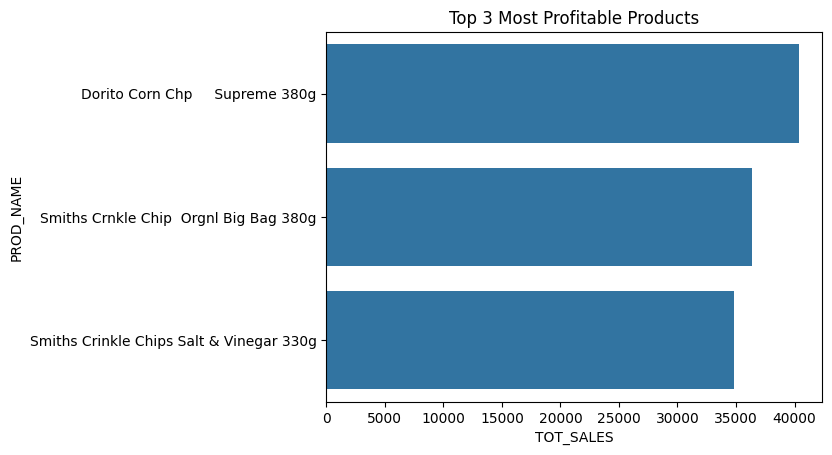

In [31]:
# Visualization
# Plot the top 3 profitable products
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_products)
plt.title('Top 3 Most Profitable Products')
plt.show()

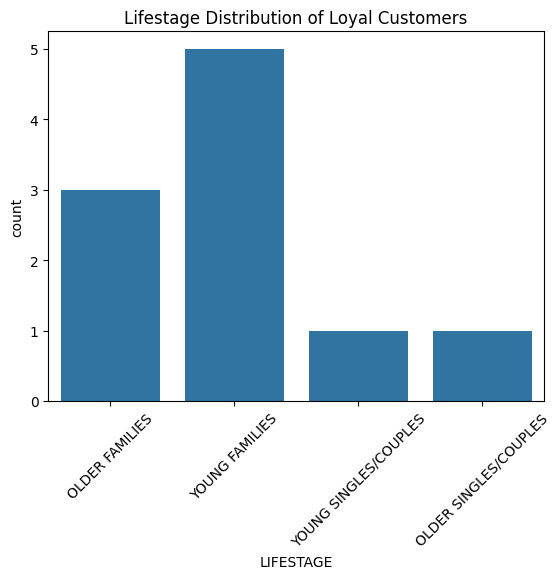

In [32]:
# Plot the distribution of LIFESTAGE for loyal customers
sns.countplot(x='LIFESTAGE', data=loyal_customers_info)
plt.title('Lifestage Distribution of Loyal Customers')
plt.xticks(rotation=45)
plt.show()

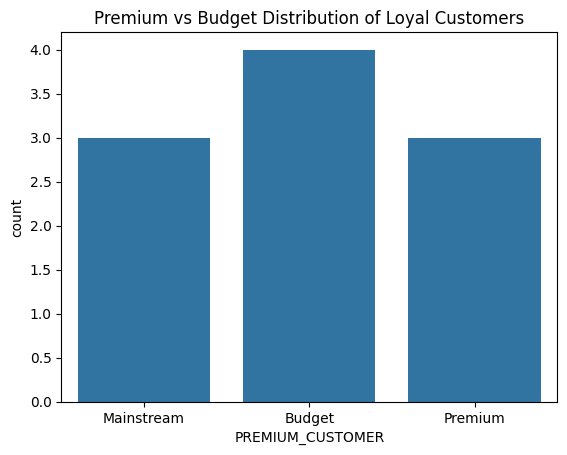

In [33]:
# Plot the distribution of PREMIUM_CUSTOMER for loyal customers
sns.countplot(x='PREMIUM_CUSTOMER', data=loyal_customers_info)
plt.title('Premium vs Budget Distribution of Loyal Customers')
plt.show()

# **Total 6 Types of Customers**

**Here are the six main customer types based on spending behavior, loyalty, and lifestage:**

1.Premium Loyal Customers → High spenders who frequently shop and prefer premium products.

2.Premium Occasional Customers → High spenders who shop occasionally, maybe during promotions.

3.Budget Loyal Customers → Price-conscious but frequent shoppers who look for value deals.

4.Budget Occasional Customers → Infrequent shoppers who buy only when there are discounts.

5.Young Families & Singles → Younger customers (singles or with families) who prefer convenience and smaller packs.

6.Older Families → Mature customers who buy in bulk and have strong brand loyalty.

# **Customer Lifestyles Classification**

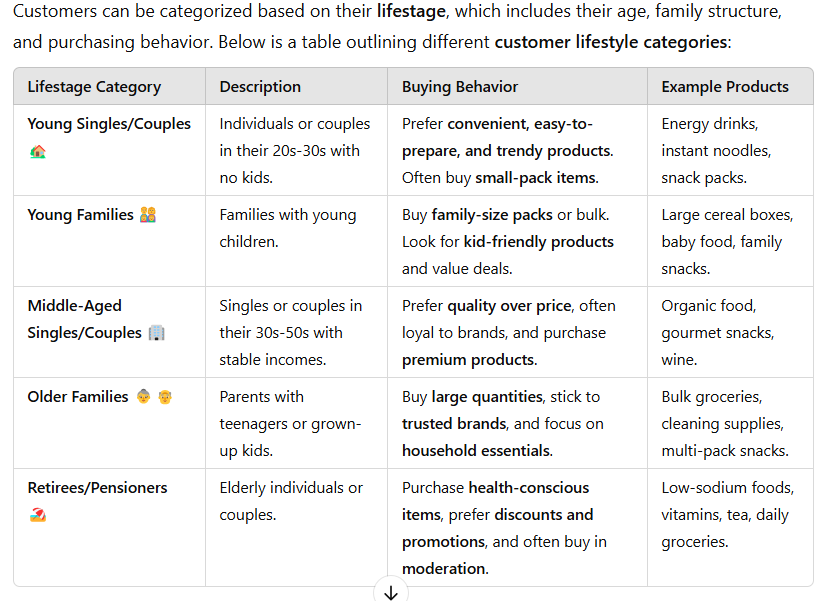

# **Conclusion:**

**After analyzing the transaction data and purchase behavior data, here are the key takeaways:**

# **Best-Selling & Profitable Products:**

Some products generate the most revenue, and they may be premium or bulk items.

If premium customers buy them, focus on luxury marketing.

If budget customers buy them, offer discounts to increase sales.

# **Loyal Customer Insights:**

If most loyal customers are young singles or families, they prefer quick, convenient products.

If they are older families, they might buy in larger quantities.

# **Spending Behavior (Premium vs. Budget Customers):**

Premium customers → Buy quality & exclusive products → Market luxury items.

Budget customers → Prefer discounts & promotions → Offer deals to attract them.

**Next Steps:**

Improve marketing strategies based on customer type.

Optimize store inventory based on best-selling products.

Target premium vs. budget customers differently.